In [60]:
import json
import pandas as pd
import numpy as np
import pymongo
import psycopg2
from psycopg2 import sql
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pymongo import MongoClient, errors
from pprint import pprint
from sklearn.model_selection import *
import urllib.request
import ssl
import xml.etree.ElementTree as ET
import hashlib

In [5]:
#loading dataset
data = pd.read_csv("Laptop_data.csv")
#Mongo Connection
mh = "localhost"
mp = 27017
mdb = "DAP1"
mcollec = "Laptop"
# Establishing the connection
client = MongoClient(mh, mp)
#Accessing the database and the collection
db = client[mdb]
collection = db[mcollec]
#Convertion df to dict 
df = data.to_dict(orient = 'records')
#Inserting data into MongoDB collection
collection.insert_many(df)


In [10]:
from pymongo import MongoClient

# MongoDB connection details
mh = "localhost"
mp = 27017
source_db = "DAP1"
new_db = "DAP_1"

# Establishing connection to MongoDB
client = MongoClient(mh, mp)

# Accessing the source and new databases
source = client[source_db]
new = client[new_db]

# List all collections in the source database
collections = source.list_collection_names()

# Iterate over collections and clone documents
for collection_name in collections:
    source_collection = source[collection_name]
    new_collection = new[collection_name]
    new_collection.drop()
    new_collection.insert_many(source_collection.find())

print("Data insertion was successful")

Data insertion was successful


In [14]:
#Establishing the connection
mongo = pymongo.MongoClient("mongodb://localhost:27017/")
# fetching the database 
database = client["DAP_1"]
#fetching the collectiong
laptop = database["Laptop"]
#Retriving the data from the collection
docu = laptop.find()

df1 = pd.DataFrame(list(docu))
# Close the MongoDB connection
client.close()

print(df1)


                           _id  Unnamed: 0 Company            TypeName  \
0     66264d462abbe30c0bb7396a           0   Apple           Ultrabook   
1     66264d462abbe30c0bb7396b           1   Apple           Ultrabook   
2     66264d462abbe30c0bb7396c           2      HP            Notebook   
3     66264d462abbe30c0bb7396d           3   Apple           Ultrabook   
4     66264d462abbe30c0bb7396e           4   Apple           Ultrabook   
...                        ...         ...     ...                 ...   
1298  66264d462abbe30c0bb73e7c        1298  Lenovo  2 in 1 Convertible   
1299  66264d462abbe30c0bb73e7d        1299  Lenovo  2 in 1 Convertible   
1300  66264d462abbe30c0bb73e7e        1300  Lenovo            Notebook   
1301  66264d462abbe30c0bb73e7f        1301      HP            Notebook   
1302  66264d462abbe30c0bb73e80        1302    Asus            Notebook   

      Inches                            ScreenResolution  \
0       13.3          IPS Panel Retina Display 2560

In [19]:
print(df1.columns)

Index(['_id', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')


In [26]:
# df1 is the DataFrame we are going to use
# Identifying any missing values
df1.isnull().sum()

_id                 0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [31]:
# Check for inconsistencies or errors in categorical columns
# Checking for unique values and their frequencies in each categorical column
categorical_columns = ['Company', 'TypeName', 'OpSys']
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df1[column].value_counts())
    print("\n")



Unique values in Company:
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


Unique values in TypeName:
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


Unique values in OpSys:
OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64




In [33]:
# Check for data integrity
# Checking if the 'Price' column is always greater than 0
print("Checking data integrity for Price column:")
if (df1['Price'] <= 0).any():
    print("There are rows where price is less than or equal to 0.")
    print(df1[df1['Price'] <= 0])
else:
    print("All prices are greater than 0.")



Checking data integrity for Price column:
All prices are greater than 0.


In [34]:
# Check for data consistency
# Checking if there are variations in representing the same information (e.g., 'Windows' vs 'windows' in the 'OpSys' column)
print("Checking data consistency:")
print(df1['OpSys'].unique())  # Check unique values in the 'OpSys' column to identify inconsistencies


Checking data consistency:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [35]:
# Convert all values in the 'OpSys' column to lowercase
df1['OpSys'] = df1['OpSys'].str.lower()

# Display unique values in the 'OpSys' column after standardization
print("Unique values in the 'OpSys' column after standardization:")
print(df1['OpSys'].unique())


Unique values in the 'OpSys' column after standardization:
['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


In [36]:
# Standardizing Column Names
df1.columns = ['_id', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
               'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
               'Weight', 'Price']

# Display the DataFrame with standardized column names
print(df1)


                           _id  Unnamed: 0 Company            TypeName  \
0     66264d462abbe30c0bb7396a           0   Apple           Ultrabook   
1     66264d462abbe30c0bb7396b           1   Apple           Ultrabook   
2     66264d462abbe30c0bb7396c           2      HP            Notebook   
3     66264d462abbe30c0bb7396d           3   Apple           Ultrabook   
4     66264d462abbe30c0bb7396e           4   Apple           Ultrabook   
...                        ...         ...     ...                 ...   
1298  66264d462abbe30c0bb73e7c        1298  Lenovo  2 in 1 Convertible   
1299  66264d462abbe30c0bb73e7d        1299  Lenovo  2 in 1 Convertible   
1300  66264d462abbe30c0bb73e7e        1300  Lenovo            Notebook   
1301  66264d462abbe30c0bb73e7f        1301      HP            Notebook   
1302  66264d462abbe30c0bb73e80        1302    Asus            Notebook   

      Inches                            ScreenResolution  \
0       13.3          IPS Panel Retina Display 2560

In [40]:
import pandas as pd

# Assuming df1 is your DataFrame

# 1. Extracting Screen Resolution Type
df1['ScreenResolution_Type'] = df1['ScreenResolution'].apply(lambda x: x.split()[-1])

# 2. Parsing CPU Information
df1['CPU_Brand'] = df1['Cpu'].apply(lambda x: x.split()[0])  # Extracting processor brand


# 3. Parsing GPU Information
df1['GPU_Brand'] = df1['Gpu'].apply(lambda x: x.split()[0])  # Extracting graphics card brand

# 4. Operating System Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['OpSys_Encoded'] = label_encoder.fit_transform(df1['OpSys'])

# 5. Extracting Manufacturer Information
df1['Manufacturer'] = df1['Company'].apply(lambda x: x.split()[0])  # Extracting manufacturer name

# 6. Screen Size Classification
def screen_size_category(size):
    if size < 14:
        return 'Small'
    elif 14 <= size < 16:
        return 'Medium'
    else:
        return 'Large'

df1['Screen_Size_Category'] = df1['Inches'].apply(screen_size_category)

# Display the DataFrame with new features
print(df1)


                           _id  Unnamed: 0 Company            TypeName  \
0     66264d462abbe30c0bb7396a           0   Apple           Ultrabook   
1     66264d462abbe30c0bb7396b           1   Apple           Ultrabook   
2     66264d462abbe30c0bb7396c           2      HP            Notebook   
3     66264d462abbe30c0bb7396d           3   Apple           Ultrabook   
4     66264d462abbe30c0bb7396e           4   Apple           Ultrabook   
...                        ...         ...     ...                 ...   
1298  66264d462abbe30c0bb73e7c        1298  Lenovo  2 in 1 Convertible   
1299  66264d462abbe30c0bb73e7d        1299  Lenovo  2 in 1 Convertible   
1300  66264d462abbe30c0bb73e7e        1300  Lenovo            Notebook   
1301  66264d462abbe30c0bb73e7f        1301      HP            Notebook   
1302  66264d462abbe30c0bb73e80        1302    Asus            Notebook   

      Inches                            ScreenResolution  \
0       13.3          IPS Panel Retina Display 2560

In [48]:


# Assuming df1 is your DataFrame

# Handling categorical data (Encoding)
label_encoder = LabelEncoder()
df1['Company_Encoded'] = label_encoder.fit_transform(df1['Company'])  # Encoding 'Company' column

# Preprocess 'Ram' column to remove 'GB' unit
df1['Ram'] = df1['Ram'].apply(lambda x: float(x.split('GB')[0]) if isinstance(x, str) else x)

# Preprocess 'Weight' column to remove 'kg' unit
df1['Weight'] = df1['Weight'].apply(lambda x: float(x.split('kg')[0]) if isinstance(x, str) else x)

# Scaling numerical data
scaler = StandardScaler()
numerical_columns = ['Inches', 'Ram', 'Weight', 'Price']
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

# Display the DataFrame with encoded categorical data and scaled numerical data
print(df1)


                           _id  Unnamed: 0 Company            TypeName  \
0     66264d462abbe30c0bb7396a           0   Apple           Ultrabook   
1     66264d462abbe30c0bb7396b           1   Apple           Ultrabook   
2     66264d462abbe30c0bb7396c           2      HP            Notebook   
3     66264d462abbe30c0bb7396d           3   Apple           Ultrabook   
4     66264d462abbe30c0bb7396e           4   Apple           Ultrabook   
...                        ...         ...     ...                 ...   
1298  66264d462abbe30c0bb73e7c        1298  Lenovo  2 in 1 Convertible   
1299  66264d462abbe30c0bb73e7d        1299  Lenovo  2 in 1 Convertible   
1300  66264d462abbe30c0bb73e7e        1300  Lenovo            Notebook   
1301  66264d462abbe30c0bb73e7f        1301      HP            Notebook   
1302  66264d462abbe30c0bb73e80        1302    Asus            Notebook   

        Inches                            ScreenResolution  \
0    -1.204407          IPS Panel Retina Display 

In [78]:

# Change column names to lowercase
df1.columns = df1.columns.str.lower()
print(df1.columns)

Index(['_id', 'unnamed: 0', 'company', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price', 'screenresolution_type', 'cpu_brand', 'memory_type',
       'gpu_brand', 'opsys_encoded', 'manufacturer', 'screen_size_category',
       'company_encoded'],
      dtype='object')


In [79]:
data = df1.drop(columns=["_id"])
data.columns

Index(['unnamed: 0', 'company', 'typename', 'inches', 'screenresolution',
       'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight', 'price',
       'screenresolution_type', 'cpu_brand', 'memory_type', 'gpu_brand',
       'opsys_encoded', 'manufacturer', 'screen_size_category',
       'company_encoded'],
      dtype='object')

In [82]:

# Define your PostgreSQL connection parameters
dbname = 'postgres'
user = 'postgres'
password = '1234'
host = 'localhost'  
port = '5432'  

# Connect to your PostgreSQL database
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Create a cursor object
cur = conn.cursor()

# Execute the table creation SQL statement
table_creation_sql = """
CREATE TABLE laptop_data (
    "unnamed: 0" INTEGER,
    Company VARCHAR(100),
    TypeName VARCHAR(100),
    Inches FLOAT,
    ScreenResolution VARCHAR(100),
    Cpu VARCHAR(200),
    Ram VARCHAR(20),
    Memory VARCHAR(100),
    Gpu VARCHAR(200),
    OpSys VARCHAR(100),
    Weight FLOAT,
    Price FLOAT,
    ScreenResolution_Type VARCHAR(20),
    CPU_Brand VARCHAR(100),
    Memory_Type VARCHAR(20),
    GPU_Brand VARCHAR(100),
    OpSys_Encoded INTEGER,
    Manufacturer VARCHAR(100),
    Screen_Size_Category VARCHAR(20),
    Company_Encoded INTEGER
);
"""
cur.execute(table_creation_sql)

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()


In [85]:
import pandas as pd
import psycopg2

def load_dataframe_to_postgresql(dataframe, table_name, host, database, user, password):
    try:
        # Connect to the PostgreSQL database
        conn = psycopg2.connect(host=host, database=database, user=user, password=password)

        # Create a cursor object
        cur = conn.cursor()

        # Iterate over rows in the DataFrame and insert them into the PostgreSQL table
        for _, row in dataframe.iterrows():
            # Convert non-serializable types to serializable types
            row = tuple(str(value) if isinstance(value, type(object)) else value for value in row)
            # Quote column names containing special characters
            columns_quoted = [f'"{col}"' for col in dataframe.columns]
            
            insert_query = f"INSERT INTO {table_name} ({', '.join(columns_quoted)}) VALUES ({', '.join(['%s'] * len(row))})"
            cur.execute(insert_query, row)

        # Commit the transaction
        conn.commit()

        # Close the cursor and connection
        cur.close()
        conn.close()

        print(f"Data loaded successfully into PostgreSQL table '{table_name}'!")
    except Exception as e:
        print("Error:", e)

# Define your PostgreSQL connection details
host = "localhost"
database = "postgres"
user = "postgres"
password = "1234"

# Define the table name
table_name = "laptop_data"

# Call the function to load the modified DataFrame into PostgreSQL
load_dataframe_to_postgresql(data, table_name, host, database, user, password)
print(data)



Data loaded successfully into PostgreSQL table 'laptop_data'!
      unnamed: 0 company            typename    inches  \
0              0   Apple           Ultrabook -1.204407   
1              1   Apple           Ultrabook -1.204407   
2              2      HP            Notebook  0.408772   
3              3   Apple           Ultrabook  0.268495   
4              4   Apple           Ultrabook -1.204407   
...          ...     ...                 ...       ...   
1298        1298  Lenovo  2 in 1 Convertible -0.713439   
1299        1299  Lenovo  2 in 1 Convertible -1.204407   
1300        1300  Lenovo            Notebook -0.713439   
1301        1301      HP            Notebook  0.408772   
1302        1302    Asus            Notebook  0.408772   

                                screenresolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Di

In [105]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [106]:
import pandas as pd
import psycopg2

# Function to extract data from PostgreSQL table and load it into a DataFrame
def extract_laptop_data_from_postgresql(host, database, user, password, table_name):
    try:
        # Connect to the PostgreSQL database
        conn = psycopg2.connect(host=host, database=database, user=user, password=password)

        # Define the query to extract data
        query = f'SELECT * FROM {table_name}'

        # Use Pandas to read SQL query results into a DataFrame
        df = pd.read_sql(query, conn)

        print("Data loaded from PostgreSQL to DataFrame successfully!")
        return df
    except Exception as e:
        print("Error loading data from PostgreSQL to DataFrame:", e)
    finally:
        # Close the connection
        if conn is not None:
            conn.close()

# Example usage:
# Replace the connection details and table name with your own
host = "localhost"
database = "postgres"
user = "postgres"
password = "1234"
table_name = "laptop_data"

# Call the function to extract data from PostgreSQL table and load it into a DataFrame
laptop_df_cleaned = extract_laptop_data_from_postgresql(host, database, user, password, table_name)
display(laptop_df_cleaned)
print(laptop_df_cleaned)

Data loaded from PostgreSQL to DataFrame successfully!


,unnamed: 0,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,screenresolution_type,cpu_brand,memory_type,gpu_brand,opsys_encoded,manufacturer,screen_size_category,company_encoded
0,0,Apple,Ultrabook,-1.204407,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,-0.07519506268436266,128GB SSD,Intel Iris Plus Graphics 640,macos,-1.005283,0.309132,2560x1600,Intel,SSD,Intel,4,Apple,Small,1
1,1,Apple,Ultrabook,-1.204407,1440x900,Intel Core i5 1.8GHz,-0.07519506268436266,128GB Flash Storage,Intel HD Graphics 6000,macos,-1.050381,-0.321646,1440x900,Intel,Storage,Intel,4,Apple,Small,1
2,2,HP,Notebook,0.408772,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,-0.07519506268436266,256GB SSD,Intel HD Graphics 620,no os,-0.268684,-0.785251,1920x1080,Intel,SSD,Intel,5,HP,Medium,7
3,3,Apple,Ultrabook,0.268495,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1.4987674542268743,512GB SSD,AMD Radeon Pro 455,macos,-0.313782,2.023301,2880x1800,Intel,SSD,AMD,4,Apple,Medium,1
4,4,Apple,Ultrabook,-1.204407,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,-0.07519506268436266,256GB SSD,Intel Iris Plus Graphics 650,macos,-1.005283,0.973055,2560x1600,Intel,SSD,Intel,4,Apple,Small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,1298,Lenovo,2 in 1 Convertible,-0.713439,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,-0.8621763211399812,128GB SSD,Intel HD Graphics 520,windows 10,-0.358880,-0.695089,1920x1080,Intel,SSD,Intel,6,Lenovo,Medium,10
3905,1299,Lenovo,2 in 1 Convertible,-1.204407,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,1.4987674542268743,512GB SSD,Intel HD Graphics 520,windows 10,-1.110512,0.537128,3200x1800,Intel,SSD,Intel,6,Lenovo,Small,10
3906,1300,Lenovo,Notebook,-0.713439,1366x768,Intel Celeron Dual Core N3050 1.6GHz,-1.2556669503677904,64GB Flash Storage,Intel HD Graphics,windows 10,-0.809859,-1.280428,1366x768,Intel,Storage,Intel,6,Lenovo,Medium,10
3907,1301,HP,Notebook,0.408772,1366x768,Intel Core i7 6500U 2.5GHz,-0.4686856919121719,1TB HDD,AMD Radeon R5 M330,windows 10,0.227393,-0.514765,1366x768,Intel,HDD,AMD,6,HP,Medium,7


      unnamed: 0 company            typename    inches  \
0              0   Apple           Ultrabook -1.204407   
1              1   Apple           Ultrabook -1.204407   
2              2      HP            Notebook  0.408772   
3              3   Apple           Ultrabook  0.268495   
4              4   Apple           Ultrabook -1.204407   
...          ...     ...                 ...       ...   
3904        1298  Lenovo  2 in 1 Convertible -0.713439   
3905        1299  Lenovo  2 in 1 Convertible -1.204407   
3906        1300  Lenovo            Notebook -0.713439   
3907        1301      HP            Notebook  0.408772   
3908        1302    Asus            Notebook  0.408772   

                                screenresolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560

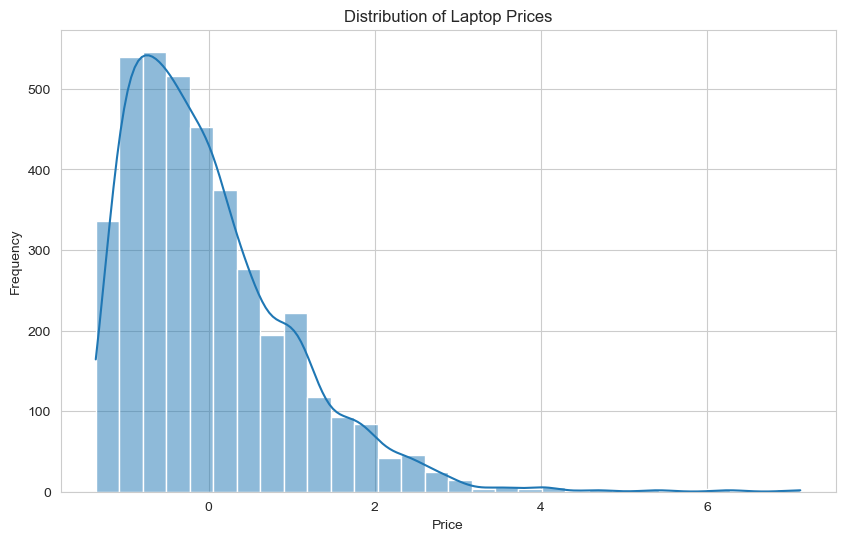

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting distribution of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(data=laptop_df_cleaned, x='price', bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

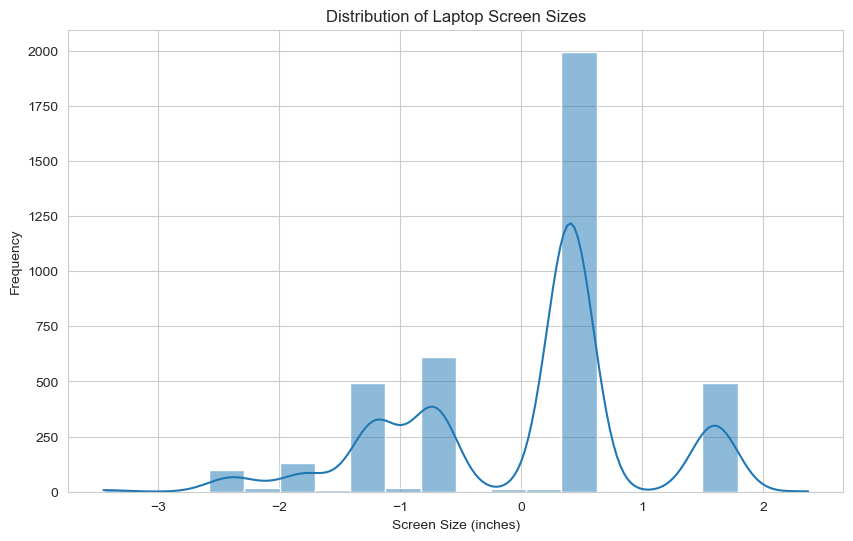

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of laptop screen sizes
plt.figure(figsize=(10, 6))
sns.histplot(data=laptop_df_cleaned, x='inches', bins=20, kde=True)
plt.title('Distribution of Laptop Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()

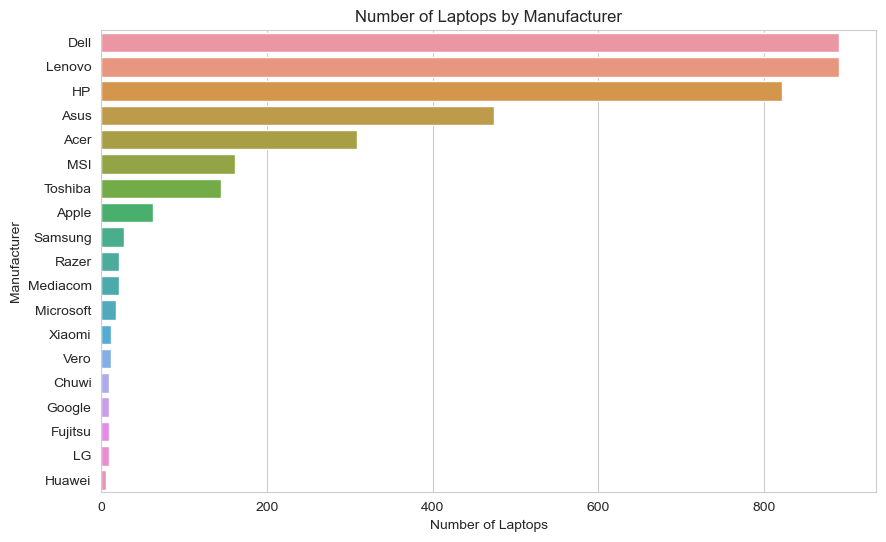

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting a count plot for laptop manufacturers
plt.figure(figsize=(10, 6))
sns.countplot(data=laptop_df_cleaned, y='manufacturer', order=laptop_df_cleaned['manufacturer'].value_counts().index)
plt.title('Number of Laptops by Manufacturer')
plt.xlabel('Number of Laptops')
plt.ylabel('Manufacturer')
plt.show()

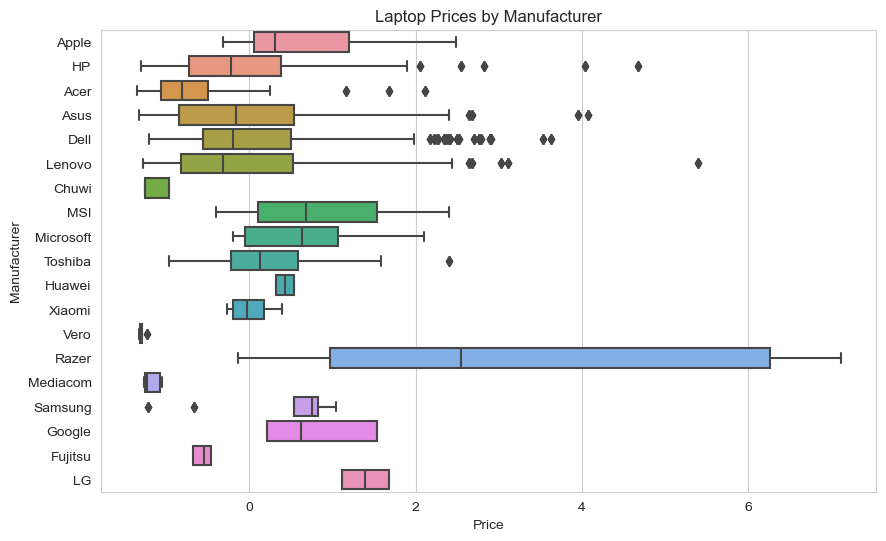

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting a boxplot for laptop prices by manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop_df_cleaned, x='price', y='manufacturer')
plt.title('Laptop Prices by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.show()

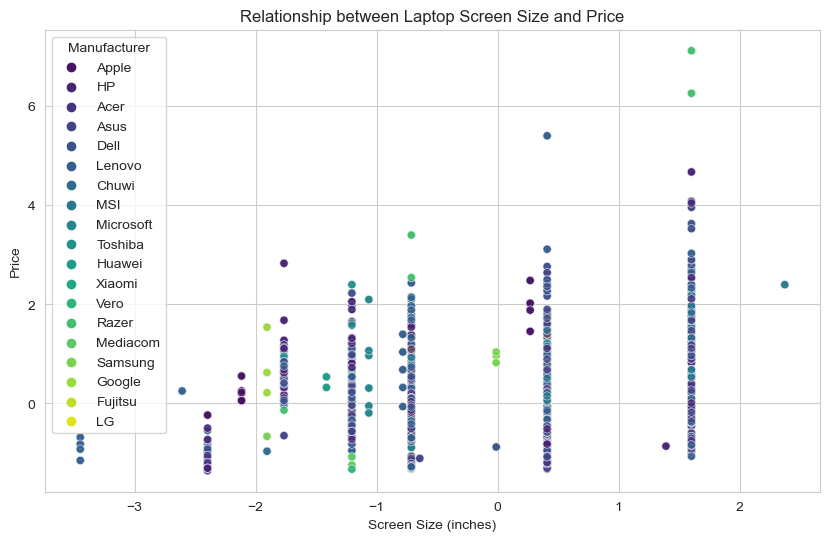

In [109]:
# Scatter plot for relationship between screen size and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=laptop_df_cleaned, x='inches', y='price', hue='manufacturer', palette='viridis', alpha=0.7)
plt.title('Relationship between Laptop Screen Size and Price')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.legend(title='Manufacturer')
plt.show()